In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("superstore-2.csv")

In [6]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### Create 3 new columns for Day, Month and Year 

In [7]:
df['Order Month'] = df['Order Date'].str[3:5]

In [8]:
df['Order Day'] = df['Order Date'].str[0:2]
df['Order Year'] = df['Order Date'].str[6:]

In [9]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Day,Order Year
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,08,16
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,08,16


### Change order date and ship date to datetime

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Day,Order Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,08,16
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,08,16


In [13]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Month      0
Order Day        0
Order Year       0
dtype: int64

### Which months had the most sales?

In [14]:
df.groupby('Order Month').sum()['Sales'].sort_values(ascending=False)

Order Month
11    352461.0710
12    325293.5035
09    307649.9457
03    205005.4888
10    200322.9847
08    159044.0630
05    155028.8117
06    152718.6793
07    147238.0970
04    137762.1286
01     94924.8356
02     59751.2514
Name: Sales, dtype: float64

### Which months had the highest profit

In [37]:
df.groupby('Order Month').sum()['Profit'].sort_values(ascending=False)

Order Month
12    43369.1919
09    36857.4753
11    35468.4265
10    31784.0413
03    28594.6872
05    22411.3078
08    21776.9384
06    21285.7954
07    13832.6648
04    11587.4363
02    10294.6107
01     9134.4461
Name: Profit, dtype: float64

In [15]:
results = df.groupby('Order Month').sum()['Sales']

Text(0.5, 0, 'Months')

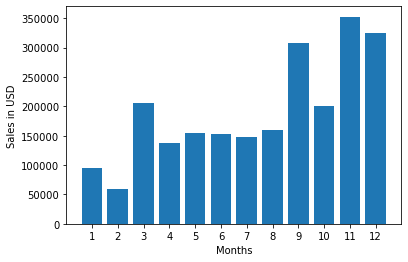

In [17]:
months = range(1,13)

plt.bar(months,results)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')

In [18]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Day,Order Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,08,16
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,08,16


### What city had the highest number of sales

In [16]:
df.groupby('City').sum()['Sales'].sort_values(ascending=False).head(10)

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

In [20]:
high_sales = df.groupby('City').sum()['Sales'].sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='City'>

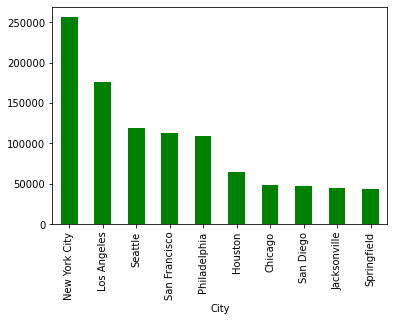

In [22]:
high_sales.plot(kind='bar', color='green')

In [48]:
type(df['Sales'][0])

numpy.float64

In [23]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Day,Order Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,08,16
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,08,16
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,06,12,16
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,11,15
4,5,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,11,15


### Change Order day, order month and order year to numeric

In [28]:
type(df['Order Year'][0])

str

In [29]:
df['Order Day'] = pd.to_numeric(df['Order Day'])
df['Order Month'] = pd.to_numeric(df['Order Month'])
df['Order Year'] = pd.to_numeric(df['Order Year'])

### Which cities had the highest average Sales in 2016

In [31]:
high = df[(df['Order Year'] == 16)]
high.groupby('City').mean()['Sales'].sort_values(ascending=False).head(10)

City
Noblesville    2678.940000
Lafayette      2633.048571
Appleton       1649.750000
Cheyenne       1603.136000
Yonkers        1531.455500
Lehi           1499.950000
Lakewood       1443.823571
Greenwood      1424.900000
Asheville      1363.960000
Sparks         1241.300000
Name: Sales, dtype: float64

### What was the distribution in terms of shipping

In [32]:
df.value_counts('Ship Mode')

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
dtype: int64

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

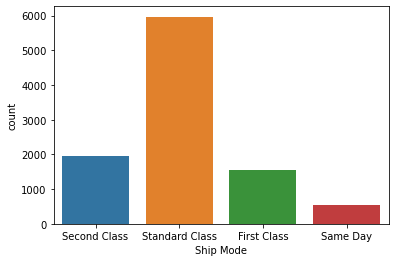

In [33]:
sns.countplot('Ship Mode', data=df)

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

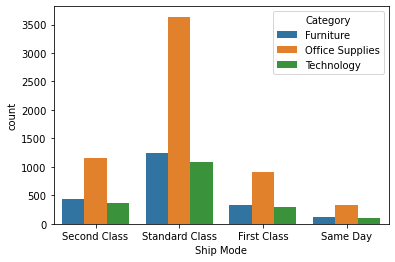

In [37]:
sns.countplot('Ship Mode', data=df, hue='Category')

In [38]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Day,Order Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,8,16
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,8,16


### What are the different sub categories for sale? 

In [40]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### What products are people in NY more likely to buy? 

In [43]:
NY=df[df['City'] == 'New York City']
NY.groupby('Sub-Category').mean()['Sales'].sort_values(ascending=False)

Sub-Category
Machines       3127.600833
Copiers        2786.642667
Chairs          647.575694
Bookcases       586.863172
Tables          476.699739
Phones          426.507079
Appliances      341.515000
Accessories     267.279844
Storage         260.472195
Binders         169.432386
Furnishings      96.900385
Supplies         84.425789
Paper            55.457742
Envelopes        54.936522
Art              30.561143
Labels           28.964444
Fasteners        12.568235
Name: Sales, dtype: float64

### What were the most used shipping option in Los Angeles?

In [52]:
la = df[df['City'] == 'Los Angeles']
la.value_counts('Ship Mode')

Ship Mode
Standard Class    449
Second Class      159
First Class       111
Same Day           28
dtype: int64